In [34]:
!pip3 install git+https://github.com/am1tyadav/tfutils.git

  Cloning https://github.com/am1tyadav/tfutils.git to c:\users\uzma\appdata\local\temp\pip-req-build-eajevyxn
  Resolved https://github.com/am1tyadav/tfutils.git to commit d55cdc73f2c79a5cbf63e4be14786978ab6f6c25
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/am1tyadav/tfutils.git 'C:\Users\Uzma\AppData\Local\Temp\pip-req-build-eajevyxn'


In [67]:

%matplotlib widget
import tensorflow as tf
import numpy as np
import os
import tfutils


from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, Conv2D, BatchNormalization
from tensorflow.keras.layers import Conv2DTranspose, Reshape, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from PIL import Image

print('TensorFlow version:', tf.__version__)

TensorFlow version: 2.13.0


## Task 2: Importing and Plotting the data

In [68]:
(x_train, y_train), (x_test, y_test)=tfutils.datasets.mnist.load_data(one_hot=False)
x_train=tfutils.datasets.mnist.load_subset([0], x_train, y_train)
x_test=tfutils.datasets.mnist.load_subset([0], x_test, y_test)

x=np.concatenate([x_train, x_test], axis=0)

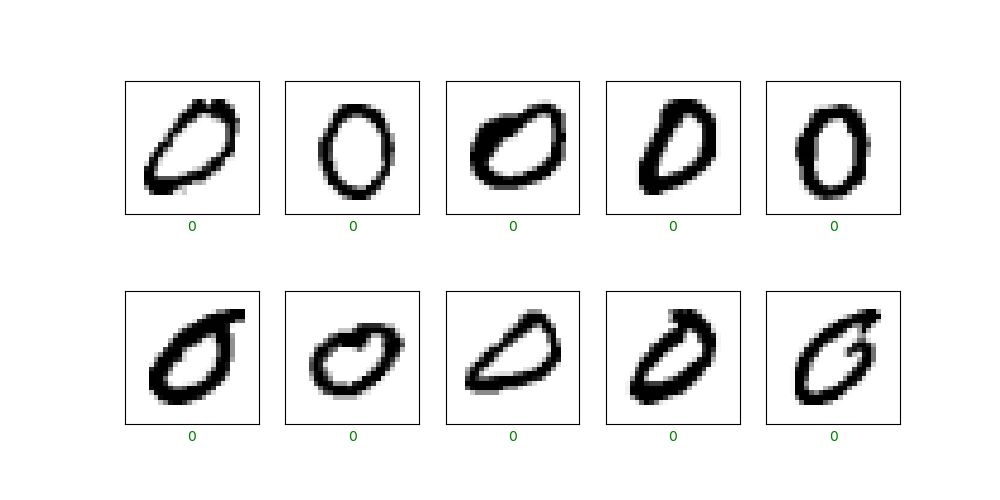

In [69]:
tfutils.datasets.mnist.plot_ten_random_examples(plt, x, np.zeros((x.shape[0],1))).show()

## Task3: Discriminator

In [70]:
discriminator=Sequential([
    Conv2D(64, 3, strides=2, input_shape=(28,28,1)),
    LeakyReLU(),
    BatchNormalization(),

    Conv2D(128, 5, strides=2),
    LeakyReLU(),
    BatchNormalization(),

    Conv2D(256, 5, strides=2),
    LeakyReLU(),
    BatchNormalization(),

    Flatten(),
    Dense(1, activation='sigmoid')

])  

opt=tf.keras.optimizers.Adam(lr=2e-4, beta_1=0.5)

discriminator.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
discriminator.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 13, 13, 64)        640       
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 13, 13, 64)        0         
                                                                 
 batch_normalization_39 (Ba  (None, 13, 13, 64)        256       
 tchNormalization)                                               
                                                                 
 conv2d_18 (Conv2D)          (None, 5, 5, 128)         204928    
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 5, 5, 128)         0         
                                                                 
 batch_normalization_40 (Ba  (None, 5, 5, 128)         512       
 tchNormalization)                                    

## Task 4: Generator

In [71]:
generator=Sequential([
    Dense(256, activation='relu', input_shape=(1, )),
    Reshape((1,1,256)),

    Conv2DTranspose(256, 5, activation='relu'),
    BatchNormalization(),

    Conv2DTranspose(128, 5, activation='relu'),
    BatchNormalization(),

    Conv2DTranspose(64, 5, strides=2, activation='relu'),
    BatchNormalization(),

    Conv2DTranspose(32, 5, activation='relu'),
    BatchNormalization(),

    Conv2DTranspose(1,4, activation='sigmoid')

])

generator.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 256)               512       
                                                                 
 reshape_8 (Reshape)         (None, 1, 1, 256)         0         
                                                                 
 conv2d_transpose_29 (Conv2  (None, 5, 5, 256)         1638656   
 DTranspose)                                                     
                                                                 
 batch_normalization_42 (Ba  (None, 5, 5, 256)         1024      
 tchNormalization)                                               
                                                                 
 conv2d_transpose_30 (Conv2  (None, 9, 9, 128)         819328    
 DTranspose)                                                     
                                                     

1/1 [==============================] - 0s 176ms/step


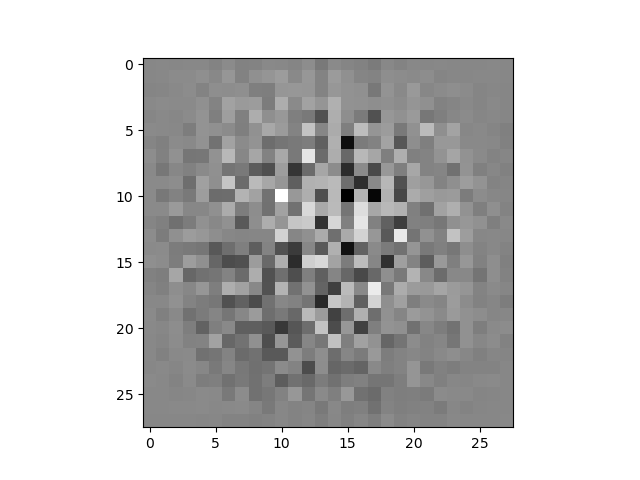

In [72]:
noise= np.random.randn(1,1)
gen_image=generator.predict(noise)[0]

plt.figure()
plt.imshow(np.reshape(gen_image, (28,28)), cmap='binary')
plt.show()

## Task5: Generative Adversarial network

In [73]:
input_layer=tf.keras.layers.Input(shape=(1, ))
gen_out=generator(input_layer)
disc_out=discriminator(gen_out)

gan= Model(
    input_layer,
    disc_out

)

discriminator.trainable=False
gan.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
gan.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 sequential_10 (Sequential)  (None, 28, 28, 1)         2717025   
                                                                 
 sequential_9 (Sequential)   (None, 1)                 1027073   
                                                                 
Total params: 3744098 (14.28 MB)
Trainable params: 2716065 (10.36 MB)
Non-trainable params: 1028033 (3.92 MB)
_________________________________________________________________


## Task 6: Training the GAN

In [74]:
epochs=25
batch_size=128
steps_per_epoch=int(2*x.shape[0]/batch_size)

print('Steps per epoch=', steps_per_epoch)

Steps per epoch= 107


2/2 [==============================] - 0s 101ms/step


KeyError: in user code:

    File "D:\Anaconda\k\Lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "D:\Anaconda\k\Lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\Anaconda\k\Lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "D:\Anaconda\k\Lib\site-packages\keras\src\engine\training.py", line 1084, in train_step
        self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "D:\Anaconda\k\Lib\site-packages\keras\src\optimizers\optimizer.py", line 544, in minimize
        self.apply_gradients(grads_and_vars)
    File "D:\Anaconda\k\Lib\site-packages\keras\src\optimizers\optimizer.py", line 1230, in apply_gradients
        return super().apply_gradients(grads_and_vars, name=name)
    File "D:\Anaconda\k\Lib\site-packages\keras\src\optimizers\optimizer.py", line 652, in apply_gradients
        iteration = self._internal_apply_gradients(grads_and_vars)
    File "D:\Anaconda\k\Lib\site-packages\keras\src\optimizers\optimizer.py", line 1260, in _internal_apply_gradients
        return tf.__internal__.distribute.interim.maybe_merge_call(
    File "D:\Anaconda\k\Lib\site-packages\keras\src\optimizers\optimizer.py", line 1352, in _distributed_apply_gradients_fn
        distribution.extended.update(
    File "D:\Anaconda\k\Lib\site-packages\keras\src\optimizers\optimizer.py", line 1349, in apply_grad_to_update_var  **
        return self._update_step(grad, var)
    File "D:\Anaconda\k\Lib\site-packages\keras\src\optimizers\optimizer.py", line 233, in _update_step
        raise KeyError(

    KeyError: 'The optimizer cannot recognize variable dense_13/kernel:0. This usually means you are trying to call the optimizer to update different parts of the model separately. Please call `optimizer.build(variables)` with the full list of trainable variables before the training loop or use legacy optimizer `tf.keras.optimizers.legacy.Adam.'


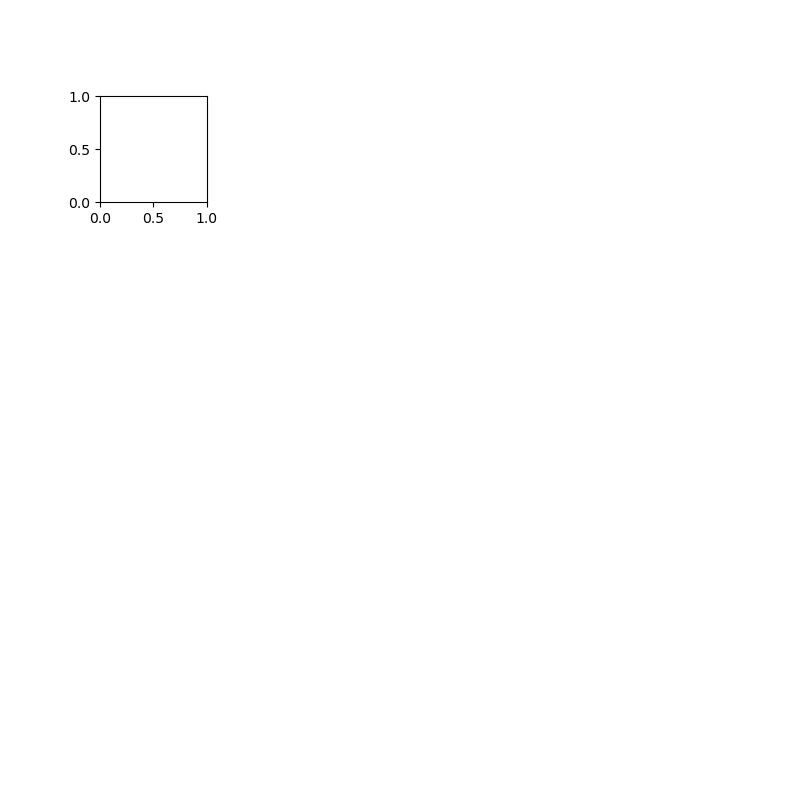

In [75]:
dp=tfutils.plotting.DynamicPlot(plt, 5, 5, (8,8))

for e in range(0, epochs):
    dp.start_of_epoch(e)

    for step in range(0, steps_per_epoch):
        true_examples=x[int(batch_size/2)*step: int(batch_size/2)*(step+1)]
        true_examples=np.reshape(true_examples, (true_examples.shape[0], 28, 28, 1))

        noise=np.random.randn(int(batch_size/2),1)
        gen_examples=generator.predict(noise)

        x_batch=np.concatenate([gen_examples, true_examples], axis=0)
        y_batch=np.array([0]*int(batch_size/2) +[1]*int(batch_size/2))

        indices=np.random.choice(range(batch_size), batch_size, replace=False)

        x_batch= x_batch[indices]
        y_batch=y_batch[indices]

        discriminator.trainable= True
        discriminator.train_on_batch(x_batch, y_batch)
        discriminator.trainable=False

        loss, _ =gan.train_on_batch(noise, np.ones((int(batch_size/2), 1)))
        _, acc=discriminator. evaluate(x_batch, y_batch, verbose=False)

    noise=np.random.randn(1,1)
    gen_image=generator.predict(noise)[0]
    gen_image=np.reshape(gen_image, (28,28))
    dp.end_of_epoch(gen_image, 'binary', 'DiscAcc:{:.2f}'. format(acc), 'GANLoss:{:.2f}'.format(loss))

In [77]:
from tensorflow.keras.optimizers import Adam

1/1 [==============================] - 0s 26ms/step


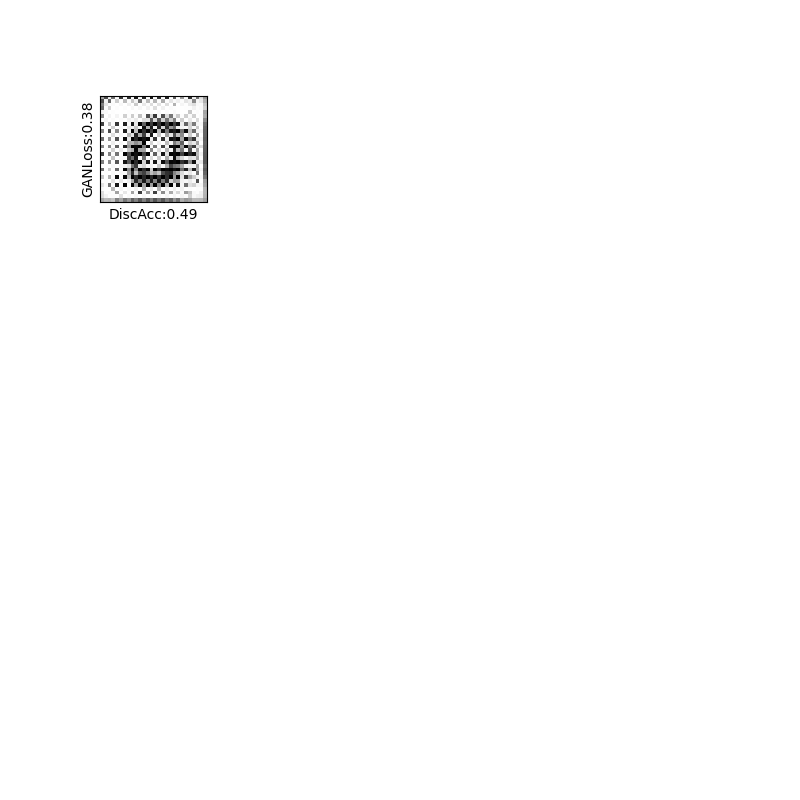

1/1 [==============================] - 0s 30ms/step


In [79]:
discriminator_optimizer = Adam(lr=2e-4, beta_1=0.5)
gan_optimizer = Adam(lr=2e-4, beta_1=0.5)  # Can be the same as discriminator_optimizer if you prefer

# Compile models
discriminator.compile(loss='binary_crossentropy', optimizer=discriminator_optimizer, metrics=['accuracy'])
# Make sure to compile GAN after setting discriminator to not trainable
discriminator.trainable = False
gan.compile(loss='binary_crossentropy', optimizer=gan_optimizer, metrics=['accuracy'])



# Your training loop
for e in range(0, epochs):
    # Your existing loop logic
    for step in range(0, steps_per_epoch):            
        true_examples=x[int(batch_size/2)*step: int(batch_size/2)*(step+1)]
        true_examples=np.reshape(true_examples, (true_examples.shape[0], 28, 28, 1))

        noise=np.random.randn(int(batch_size/2),1)
        gen_examples=generator.predict(noise)

        x_batch=np.concatenate([gen_examples, true_examples], axis=0)
        y_batch=np.array([0]*int(batch_size/2) +[1]*int(batch_size/2))

        indices=np.random.choice(range(batch_size), batch_size, replace=False)

        x_batch= x_batch[indices]
        y_batch=y_batch[indices]# Existing logic to prepare x_batch and y_batch
        
        # Train discriminator
        discriminator.trainable = True
        # Consider recompiling discriminator if changing trainable status has no effect
        discriminator.train_on_batch(x_batch, y_batch)
        discriminator.trainable = False
        
        # Train GAN (which trains the generator part)
        loss, _ =gan.train_on_batch(noise, np.ones((int(batch_size/2), 1)))
        
        # Evaluate discriminator
        _, acc = discriminator.evaluate(x_batch, y_batch, verbose=False)


    noise=np.random.randn(1,1)
    gen_image=generator.predict(noise)[0]
    gen_image=np.reshape(gen_image, (28,28))
    dp.end_of_epoch(gen_image, 'binary', 'DiscAcc:{:.2f}'. format(acc), 'GANLoss:{:.2f}'.format(loss))
    
    # Generate and display image for the epoch
    # Existing logic for generating and displaying image